In [1]:
import pandas as pd
from torch.utils.data import DataLoader
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class NailDataset():
    def __init__(self, annotations_file, img_dir=None, transform=None, target_transform=None):
        self.df = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df["image_path"][idx]
        mask_path = self.df["mask_path"][idx]
        
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)
        mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_AREA)
        image = image[:,:,::-1]
#         mask = mask[:,:,::-1]
#         print(image.shape)
        image = np.moveaxis(image, (0,1,2), (1,2,0))
        print(image.shape)
        print(mask.shape)
        return image.copy(), mask.copy()

In [3]:
data = NailDataset("data.csv")

In [14]:
dataloader = DataLoader(data, batch_size=1, shuffle=True)

(3, 256, 256)
(256, 256)


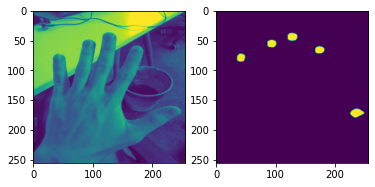

In [38]:
image, mask = next(iter(dataloader))
plt.subplot(1,2,1)
plt.imshow(image[0][1])
plt.subplot(1,2,2)
plt.imshow(mask[0])

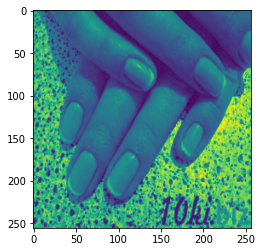

In [16]:
plt.subplot(1,2,1)
plt.imshow(image[0][1])
plt.subplot(1,2,2)
plt.imshow(mask[0])

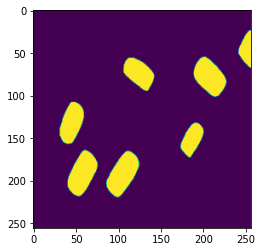

In [17]:
plt.imshow(mask[0])

In [ ]:
for data, mask in enumerate(dataloader):
    plt.subplot(2,5,1)
    plt.imshow(data[0][1])

In [2]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
